In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# One Sample T-Test

In [16]:
from scipy.stats import ttest_1samp

In [7]:
ages = np.round(np.random.normal(30,4,40))

In [8]:
ages

array([28., 33., 34., 33., 23., 23., 33., 34., 23., 37., 30., 32., 27.,
       30., 29., 35., 29., 32., 35., 32., 37., 31., 26., 33., 35., 30.,
       29., 30., 35., 26., 29., 33., 37., 28., 36., 28., 33., 28., 28.,
       27.])

In [30]:
len(ages)

40

In [9]:
df = pd.DataFrame({'ages' : ages})

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ages', ylabel='Density'>

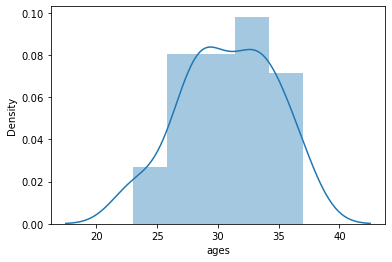

In [31]:
sns.distplot(df['ages'])

In [12]:
df.head(5)

,ages
0,28.0
1,33.0
2,34.0
3,33.0
4,23.0


In [13]:
df.describe()

,ages
count,40.000000
mean,30.775000
std,3.852988
min,23.000000
25%,28.000000
50%,30.500000
75%,33.250000
max,37.000000


- Ho : Age Mean Population = 25
- Ha : Age Mean Population < 25 (two-side)

In [26]:
stat, p_value = ttest_1samp(df['ages'], 25)

In [27]:
p_value = p_value/2

In [57]:
alpha = 0.05

if p_value <= alpha:
    print('Reject Ho')
else:
    print("Don't Reject Ho")

Don't Reject Ho


## Independet T-Test

In [32]:
from scipy.stats import ttest_ind

In [33]:
hat = pd.concat([pd.Series(data = ['Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No','Yes','Yes', 'No','Yes','Yes','No','Yes','No','Yes','No','No','No','Yes'],name = 'Wearing Hat'),
                pd.Series(data = [70,85,80,45,80,70,90,70,55,80,75,60,70,85,80,85,55,75,65,70], name ='Score')],axis = 1)

In [35]:
hat.head()

,Wearing Hat,Score
0,Yes,70
1,No,85
2,Yes,80
3,Yes,45
4,No,80


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Score', ylabel='Density'>

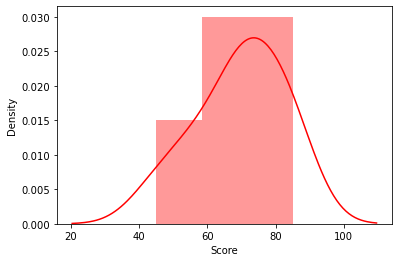

In [42]:
sns.distplot(hat.loc[hat['Wearing Hat'] == 'Yes']['Score'], color='red', label='Wearing Hat')

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

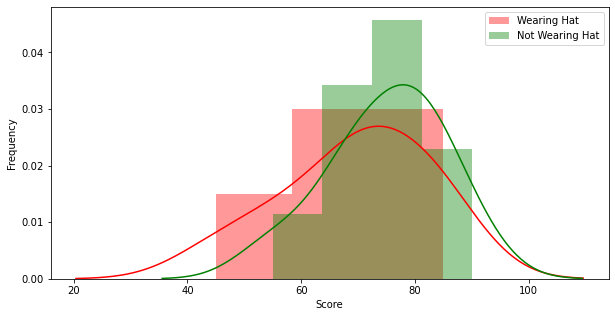

In [49]:
plt.figure(figsize=(10,5))
sns.distplot(hat.loc[hat['Wearing Hat'] == 'Yes']['Score'], color='red', label='Wearing Hat')
sns.distplot(hat.loc[hat['Wearing Hat'] == 'No']['Score'], color='green', label='Not Wearing Hat')
plt.legend()
plt.ylabel('Frequency')

- Ho : Mean Population Not Wearing Hat = Mean Population Wearing Hat
- Ha : Mean Population Not Wearing Hat != Mean Population Wearing Hat (two-side)
- Ha : Mean Population Not Wearing Hat < Mean Population Wearing Hat (one-side)

In [58]:
stat, p_value = ttest_ind(hat.loc[hat['Wearing Hat'] == 'No']['Score'],
         hat.loc[hat['Wearing Hat'] == 'Yes']['Score'],)

In [63]:
p_value = p_value

In [64]:
alpha = 0.05

if p_value <= alpha:
    print('Reject Ho')
else:
    print("Don't Reject Ho")

Don't Reject Ho


## Paired T-test

In [65]:
# Reaction time driving skill before cell phone vs using cell phone

In [66]:
with_cell_phone = [604,556,540,522,469,544,513,470,556,531,599,537,619,536,554,467]
without_cell_phone = [636,623,615,672,601,600,542,554,543,520,609,559,595,565,573,554]

In [68]:
df_paired = pd.DataFrame({
    'no' : without_cell_phone,
    'yes' : with_cell_phone
})

In [70]:
df_paired['diff'] = df_paired['yes'] - df_paired['no']

In [71]:
df_paired

,no,yes,diff
0,636,604,-32
1,623,556,-67
2,615,540,-75
3,672,522,-150
4,601,469,-132
5,600,544,-56
6,542,513,-29
7,554,470,-84
8,543,556,13
9,520,531,11


- Ho: Mean Population of Difference (yes-no) = 0
- Ha: Mean Population of Difference (yes-no) < 0

In [72]:
stat, p_value = ttest_1samp(df_paired['diff'], 0)

In [73]:
p_value = p_value/2

In [74]:
alpha = 0.05

if p_value <= alpha:
    print('Reject Ho')
else:
    print("Don't Reject Ho")

Reject Ho


## Anova One-Way

In [85]:
from scipy.stats import f_oneway

In [79]:
transport = []
method = ['Walking ', 'Public ', 'Private ']
for i in method:
    transport.extend((i*10).split())

In [80]:
transportdf = pd.concat([pd.Series(transport, name = 'Transportation'), 
                     pd.Series([5,4,5,6,5,3,2,4,5,5,7,7,5,6,4,6,5,5,6,7,5,4,5,6,6,5,5,5,7,7], name = 'Study Hour')], axis =1)

In [84]:
transportdf.sample(7)

,Transportation,Study Hour
6,Walking,2
2,Walking,5
9,Walking,5
12,Public,5
24,Private,6
23,Private,6
21,Private,4


In [93]:
transportdf.loc[transportdf['Transportation'] == 'Walking']['Study Hour'].describe()

count    10.000000
mean      4.400000
std       1.173788
min       2.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       6.000000
Name: Study Hour, dtype: float64

In [94]:
transportdf.loc[transportdf['Transportation'] == 'Public']['Study Hour'].describe()

count    10.000000
mean      5.800000
std       1.032796
min       4.000000
25%       5.000000
50%       6.000000
75%       6.750000
max       7.000000
Name: Study Hour, dtype: float64

In [95]:
transportdf.loc[transportdf['Transportation'] == 'Private']['Study Hour'].describe()

count    10.000000
mean      5.500000
std       0.971825
min       4.000000
25%       5.000000
50%       5.000000
75%       6.000000
max       7.000000
Name: Study Hour, dtype: float64

- Ho: mD1 = mD2 = mD3
- Ha: mD1 != mD2 = mD3 (atleast one pair populatiobn are not equal)

In [91]:
stat, p_value = f_oneway(
                    transportdf.loc[transportdf['Transportation'] == 'Walking']['Study Hour'],
                    transportdf.loc[transportdf['Transportation'] == 'Public']['Study Hour'],
                    transportdf.loc[transportdf['Transportation'] == 'Private']['Study Hour'],   
                )

In [92]:
p_value

0.0163405142361861

In [90]:
alpha = 0.05

if p_value <= alpha:
    print('Reject Ho')
else:
    print("Don't Reject Ho")

Reject Ho
